In [2]:
import shap
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)
feature_names = list(X.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [3]:
# Overview the Dataset

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640442,1.455960,2.572562,1.506222,4.228857,1.758232,0.848806,0.470506,7385.911621,403.014771,12.347933,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


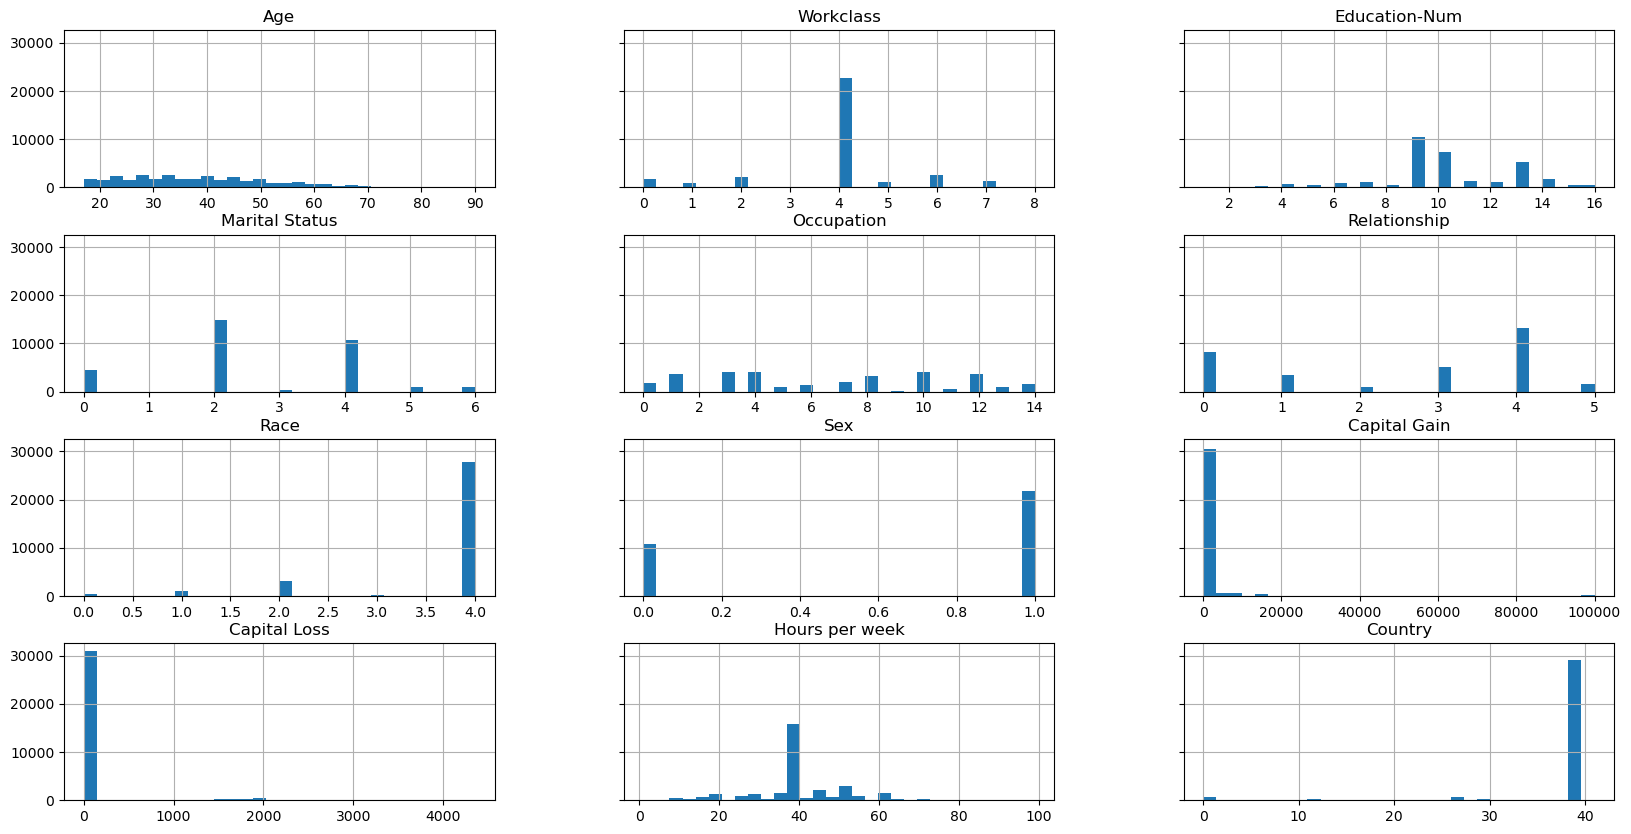

In [4]:
display(X.describe())
hist = X.hist(bins=30, sharey=True, figsize=(20, 10))

In [5]:
# Split the Dataset into Train, Validation, and Test Datasets

In [6]:
## The dataset is randomly sorted with the fixed random seed: 80% of the dataset for training and 20% for test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_display = X_display.loc[X_train.index]

In [8]:
## Split the training set to separate out a validation set.

In [9]:
## 75% of the training set becomes the final training set, and the rest is the validation set.

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
X_train_display = X_display.loc[X_train.index]
X_val_display = X_display.loc[X_val.index]

In [11]:
## Using the pandas package, explicitly align each dataset by concatenating the numeric features with the true labels.

In [12]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index=X_train.index,
                             name='Income>50K', dtype=int), X_train], axis=1)
validation = pd.concat([pd.Series(y_val, index=X_val.index,
                            name='Income>50K', dtype=int), X_val], axis=1)
test = pd.concat([pd.Series(y_test, index=X_test.index,
                            name='Income>50K', dtype=int), X_test], axis=1)

In [13]:
train

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [14]:
validation

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [15]:
test

,Income>50K,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
9646,0,62.0,6,4.0,6,8,0,4,0,0.0,0.0,66.0,39
709,0,18.0,4,7.0,4,8,2,4,1,0.0,0.0,25.0,39
7385,1,25.0,4,13.0,4,5,3,4,1,27828.0,0.0,50.0,39
16671,0,33.0,4,9.0,2,10,4,4,1,0.0,0.0,40.0,39
21932,0,36.0,4,7.0,4,7,1,4,0,0.0,0.0,40.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5889,1,39.0,4,13.0,2,10,5,4,0,0.0,0.0,20.0,39
25723,0,17.0,4,6.0,4,12,3,4,0,0.0,0.0,20.0,39
29514,0,35.0,4,9.0,4,14,3,4,1,0.0,0.0,40.0,39
1600,0,30.0,4,7.0,2,3,4,4,1,0.0,0.0,45.0,39


In [16]:
# Convert the Train and Validation Datasets to CSV Files

In [17]:
# Use 'csv' format to store the data
# The first column is expected to be the output column
train.to_csv('train.csv', index=False, header=False)
validation.to_csv('validation.csv', index=False, header=False)

In [18]:
# Upload the Datasets to Amazon S3

In [19]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()
prefix = "demo-sagemaker-xgboost-adult-income-prediction"

boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/train.csv')).upload_file('train.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(
    os.path.join(prefix, 'data/validation.csv')).upload_file('validation.csv')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [20]:
! aws s3 ls {bucket}/{prefix}/data --recursive

2024-06-14 00:03:59     786285 demo-sagemaker-xgboost-adult-income-prediction/data/train.csv
2024-06-14 00:03:59     262122 demo-sagemaker-xgboost-adult-income-prediction/data/validation.csv


In [21]:
# Train the Model

In [22]:
## Create and Run a Training Job

In [23]:
import sagemaker

region = sagemaker.Session().boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))

AWS Region: us-east-2
RoleArn: arn:aws:iam::471112560639:role/service-role/AmazonSageMaker-ExecutionRole-20240611T195216


In [24]:
sagemaker.__version__

'2.221.1'

In [25]:
# Create an XGBoost estimator using the sagemaker.estimator.Estimator class. The XGBoost estimator is named xgb_model.

In [26]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.session import TrainingInput

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

xgb_model=sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    volume_size=5,
    output_path=s3_output_location,
    sagemaker_session=sagemaker.Session(),
    rules=[
        Rule.sagemaker(rule_configs.create_xgboost_report()),
        ProfilerRule.sagemaker(rule_configs.ProfilerReport())
    ]
)

257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.2-1


In [27]:
xgb_model.set_hyperparameters(
    max_depth = 5,
    eta = 0.2,
    gamma = 4,
    min_child_weight = 6,
    subsample = 0.7,
    objective = "binary:logistic",
    num_round = 1000
)

In [28]:
# Use the TrainingInput class to configure a data input flow for training. The following code shows how to configure TrainingInput objects to use the training and validation datasets you uploaded to Amazon S3 in the Split the Dataset into Train, Validation, and Test Datasets section.

In [29]:
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

In [30]:
# Train the model

In [31]:
xgb_model.fit({"train": train_input, "validation": validation_input}, wait=True)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-06-14-00-04-13-700


2024-06-14 00:04:13 Starting - Starting the training job...
2024-06-14 00:04:40 Starting - Preparing the instances for trainingCreateXgboostReport: InProgress
ProfilerReport: InProgress
...
2024-06-14 00:05:00 Downloading - Downloading input data...
2024-06-14 00:05:40 Downloading - Downloading the training image...
2024-06-14 00:06:10 Training - Training image download completed. Training in progress....[2024-06-14 00:06:27.602 ip-10-0-244-43.us-east-2.compute.internal:7 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
I

In [71]:
rule_output_path = xgb_model.output_path + "/" + xgb_model.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

In [72]:
! aws s3 cp {rule_output_path} ./ --recursive

In [73]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_report.html

In [74]:
profiler_report_name = [rule["RuleConfigurationName"] 
                        for rule in xgb_model.latest_training_job.rule_job_summary() 
                        if "Profiler" in rule["RuleConfigurationName"]][0]
profiler_report_name
display("Click link below to view the profiler report", FileLink(profiler_report_name+"/profiler-output/profiler-report.html"))

'Click link below to view the profiler report'

/home/ec2-user/SageMaker/ProfilerReport/profiler-output/profiler-report.html

In [99]:
xgb_model.model_data

's3://sagemaker-us-east-2-471112560639/demo-sagemaker-xgboost-adult-income-prediction/xgboost_model/sagemaker-xgboost-2024-06-13-02-44-54-972/output/model.tar.gz'

In [75]:
# Plot the error rate

In [ ]:
# List the log streams to get the log stream name
logs_client = boto3.client('logs')
log_group_name = '/aws/sagemaker/TrainingJobs'
response = logs_client.describe_log_streams(
    logGroupName=log_group_name,
    orderBy='LastEventTime',
    descending=True,
    limit=5
)

# Get the most recent log stream name
log_stream_name = response['logStreams'][0]['logStreamName']

# Extract logs and plot the errors
log_events = logs_client.get_log_events(
    logGroupName=log_group_name,
    logStreamName=log_stream_name
)['events']

In [ ]:
import re

epoch_pattern = re.compile(r'\[(\d+)\]#011train-error:([0-9.]+)#011validation-error:([0-9.]+)')

train_error = []
validation_error = []

for event in log_events:
    match = epoch_pattern.search(event['message'])
    if match:
        train_error.append(float(match.group(2)))
        validation_error.append(float(match.group(3)))

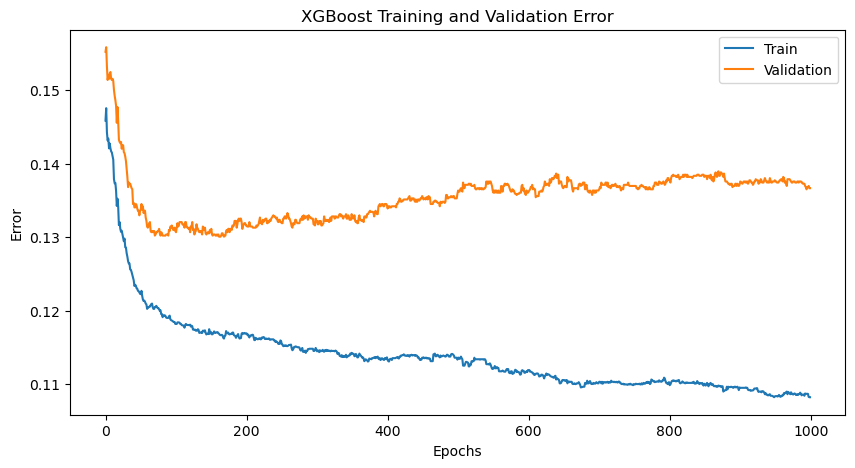

In [98]:
# Plot the training and validation error
epochs = len(train_error)
x_axis = range(0, epochs)

if epochs > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(x_axis, train_error, label='Train')
    plt.plot(x_axis, validation_error, label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('XGBoost Training and Validation Error')
    plt.show()
else:
    print("No error data found.")

In [33]:
from sagemaker.debugger import Rule, ProfilerRule, rule_configs
from sagemaker.session import TrainingInput
from sagemaker import get_execution_role
from sagemaker.tuner import HyperparameterTuner, ContinuousParameter, IntegerParameter
from sagemaker.estimator import Estimator

# Initialize the SageMaker session and get the execution role
sagemaker_session = sagemaker.Session()
role = get_execution_role()

s3_output_location='s3://{}/{}/{}'.format(bucket, prefix, 'xgboost_model')

container=sagemaker.image_uris.retrieve("xgboost", region, "1.2-1")
print(container)

# Define the XGBoost estimator
xgb_model = Estimator(
    image_uri=sagemaker.image_uris.retrieve('xgboost', sagemaker_session.boto_region_name, 'latest'),
    role=role,
    instance_count=1,
    instance_type='ml.m5.large',
    output_path=f's3://{bucket}/{prefix}/output'
)

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


257758044811.dkr.ecr.us-east-2.amazonaws.com/sagemaker-xgboost:1.2-1


In [34]:
# Set static hyperparameters
xgb_model.set_hyperparameters(
    objective='binary:logistic',
    eval_metric='error',
    num_round=1000
)

# Define the hyperparameter ranges
hyperparameter_ranges = {
    'eta': ContinuousParameter(0.01, 0.3),
    'max_depth': IntegerParameter(3, 9),
    'subsample': ContinuousParameter(0.7, 0.9),
    'colsample_bytree': ContinuousParameter(0.7, 0.9),
    'lambda': ContinuousParameter(1, 10),
    'alpha': ContinuousParameter(0, 1)
}

# Define the tuning job configuration
tuner = HyperparameterTuner(
    estimator=xgb_model,
    objective_metric_name='validation:error',
    objective_type='Minimize',  # Corrected to "Minimize"
    hyperparameter_ranges=hyperparameter_ranges,
    metric_definitions=[
        {'Name': 'validation:error', 'Regex': 'validation-error:([0-9\\.]+)'},
        {'Name': 'train:error', 'Regex': 'train-error:([0-9\\.]+)'}
    ],
    max_jobs=20,
    max_parallel_jobs=3
)

# Specify the input channels
from sagemaker.session import TrainingInput

train_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/train.csv"), content_type="csv"
)
validation_input = TrainingInput(
    "s3://{}/{}/{}".format(bucket, prefix, "data/validation.csv"), content_type="csv"
)

data_channels = {
    'train': train_input,
    'validation': validation_input
}

# Start the hyperparameter tuning job
tuner.fit(inputs=data_channels, include_cls_metadata=False)

INFO:sagemaker:Creating hyperparameter tuning job with name: xgboost-240614-0049


..........................................................................................................................!


In [43]:
# Retrieve the best training job
best_training_job_name = tuner.best_training_job()

# Retrieve the hyperparameters of the best training job
sm_client = boto3.client('sagemaker')
best_training_job_info = sm_client.describe_training_job(TrainingJobName=best_training_job_name)
best_hyperparameters = best_training_job_info['HyperParameters']

# Convert hyperparameters to the appropriate types
for key in best_hyperparameters:
    if key in ['max_depth', 'num_round']:  # Add other parameters that need to be integers
        best_hyperparameters[key] = int(best_hyperparameters[key])
    else:
        try:
            # Try converting to float
            best_hyperparameters[key] = float(best_hyperparameters[key])
        except ValueError:
            # If it fails, leave the value as it is (likely a string)
            pass

print("Best hyperparameters: ", best_hyperparameters)

Best hyperparameters:  {'_tuning_objective_metric': 'validation:error', 'alpha': 0.4672026147383481, 'colsample_bytree': 0.8208941193022923, 'eta': 0.027676157656332023, 'eval_metric': 'error', 'lambda': 1.5502294523146085, 'max_depth': 4, 'num_round': 1000, 'objective': 'binary:logistic', 'subsample': 0.7112567007858653}


In [62]:
# Train the final model with the best hyperparameters
best_xgb_estimator = Estimator(
    image_uri=sagemaker.image_uris.retrieve('xgboost', sagemaker_session.boto_region_name, 'latest'),
    role=role,
    instance_count=1,
    instance_type='ml.m5.large',
    output_path=f's3://{bucket}/{prefix}/output'
)

# Ensure no duplication of num_round
#best_hyperparameters.pop('num_round', None)
#best_hyperparameters.pop('eval_metric', None)
#best_hyperparameters.pop('objective', None)

best_xgb_estimator.set_hyperparameters(
    objective='binary:logistic',
    eval_metric='error',
    num_round=1000,
    **best_hyperparameters
)

# Fit the final model
best_xgb_estimator.fit(inputs=data_channels)

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.
INFO:sagemaker:Creating training-job with name: xgboost-2024-06-14-01-44-46-917


2024-06-14 01:44:47 Starting - Starting the training job...
2024-06-14 01:45:08 Starting - Preparing the instances for training...
2024-06-14 01:45:31 Downloading - Downloading input data...
2024-06-14 01:46:16 Downloading - Downloading the training image.....Arguments: train
[2024-06-14:01:46:56:INFO] Running standalone xgboost training.
[2024-06-14:01:46:56:INFO] Setting up HPO optimized metric to be : error
[2024-06-14:01:46:56:INFO] File size need to be processed in the node: 1.0mb. Available memory size in the node: 266.17mb
[2024-06-14:01:46:56:INFO] Determined delimiter of CSV input is ','
[01:46:56] S3DistributionType set as FullyReplicated
[01:46:56] 19536x12 matrix with 234432 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
[2024-06-14:01:46:56:INFO] Determined delimiter of CSV input is ','
[01:46:56] S3DistributionType set as FullyReplicated
[01:46:56] 6512x12 matrix with 78144 entries loaded from /opt/ml/input/data/validation?format=csv&la

In [63]:
rule_output_path = xgb_model.output_path + "/" + best_xgb_estimator.latest_training_job.job_name + "/rule-output"
! aws s3 ls {rule_output_path} --recursive

In [64]:
! aws s3 cp {rule_output_path} ./ --recursive

In [65]:
from IPython.display import FileLink, FileLinks
display("Click link below to view the XGBoost Training report", FileLink("CreateXgboostReport/xgboost_best_report.html"))

'Click link below to view the XGBoost Training report'

/home/ec2-user/SageMaker/CreateXgboostReport/xgboost_best_report.html

In [66]:
best_xgb_estimator.model_data

's3://sagemaker-us-east-2-471112560639/demo-sagemaker-xgboost-adult-income-prediction/output/xgboost-2024-06-14-01-44-46-917/output/model.tar.gz'

In [67]:
# Plot the error rate

In [68]:
# List the log streams to get the log stream name
logs_client = boto3.client('logs')
log_group_name = '/aws/sagemaker/TrainingJobs'
response = logs_client.describe_log_streams(
    logGroupName=log_group_name,
    orderBy='LastEventTime',
    descending=True,
    limit=5
)

# Get the most recent log stream name
log_stream_name = response['logStreams'][0]['logStreamName']

# Extract logs and plot the errors
log_events = logs_client.get_log_events(
    logGroupName=log_group_name,
    logStreamName=log_stream_name
)['events']

In [69]:
import re

epoch_pattern = re.compile(r'\[(\d+)\]#011train-error:([0-9.]+)#011validation-error:([0-9.]+)')

train_error = []
validation_error = []

for event in log_events:
    match = epoch_pattern.search(event['message'])
    if match:
        train_error.append(float(match.group(2)))
        validation_error.append(float(match.group(3)))

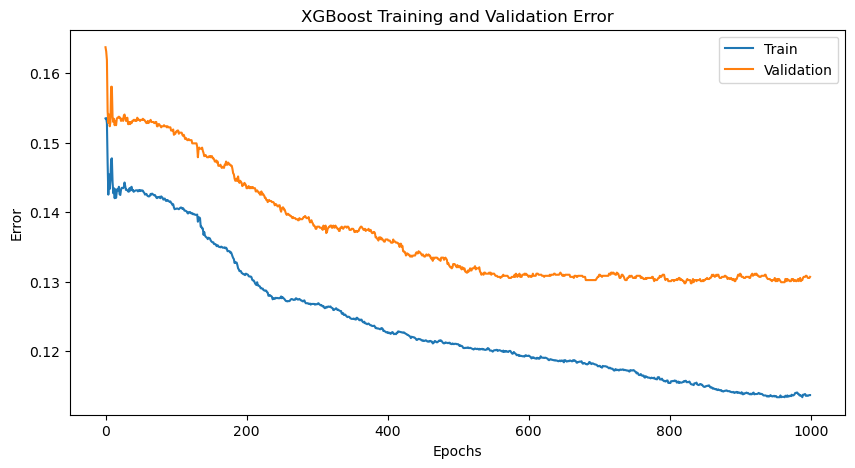

In [70]:
# Plot the training and validation error
import matplotlib.pyplot as plt

epochs = len(train_error)
x_axis = range(0, epochs)

if epochs > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(x_axis, train_error, label='Train')
    plt.plot(x_axis, validation_error, label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('XGBoost Training and Validation Error')
    plt.show()
else:
    print("No error data found.")

In [71]:
# Deploy the Model to SageMaker Hosting Services

In [72]:
import sagemaker
from sagemaker.serializers import CSVSerializer
xgb_predictor=best_xgb_estimator.deploy(
    initial_instance_count=1,
    instance_type='ml.t2.medium',
    serializer=CSVSerializer()
)

INFO:sagemaker:Creating model with name: xgboost-2024-06-14-01-52-20-277
INFO:sagemaker:Creating endpoint-config with name xgboost-2024-06-14-01-52-20-277
INFO:sagemaker:Creating endpoint with name xgboost-2024-06-14-01-52-20-277


--------!

In [73]:
xgb_predictor.endpoint_name

'xgboost-2024-06-14-01-52-20-277'

In [74]:
# Evaluate the Model Deployed to SageMaker Hosting Services

In [75]:
# Following function to predict each line of the test set

import numpy as np
def predict(data, rows=1000):
    split_array = np.array_split(data, int(data.shape[0] / float(rows) + 1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

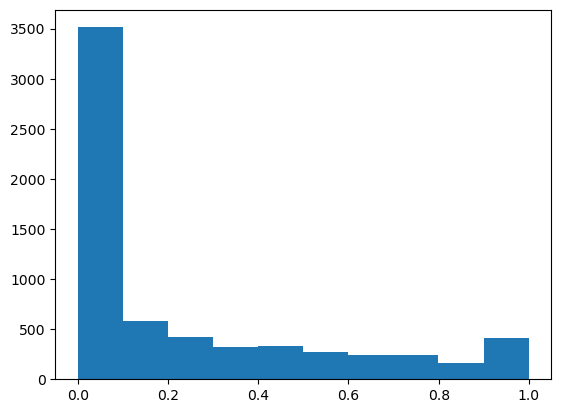

In [76]:
# Make predictions of the test dataset and plot a histogram

import matplotlib.pyplot as plt

predictions=predict(test.to_numpy()[:,1:])
plt.hist(predictions)
plt.show()

In [77]:
# To determine True or False based on the float values, set a cutoff value = 0.5

import sklearn

cutoff=0.5
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4693  333]
 [ 489  998]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      5026
           1       0.75      0.67      0.71      1487

    accuracy                           0.87      6513
   macro avg       0.83      0.80      0.81      6513
weighted avg       0.87      0.87      0.87      6513



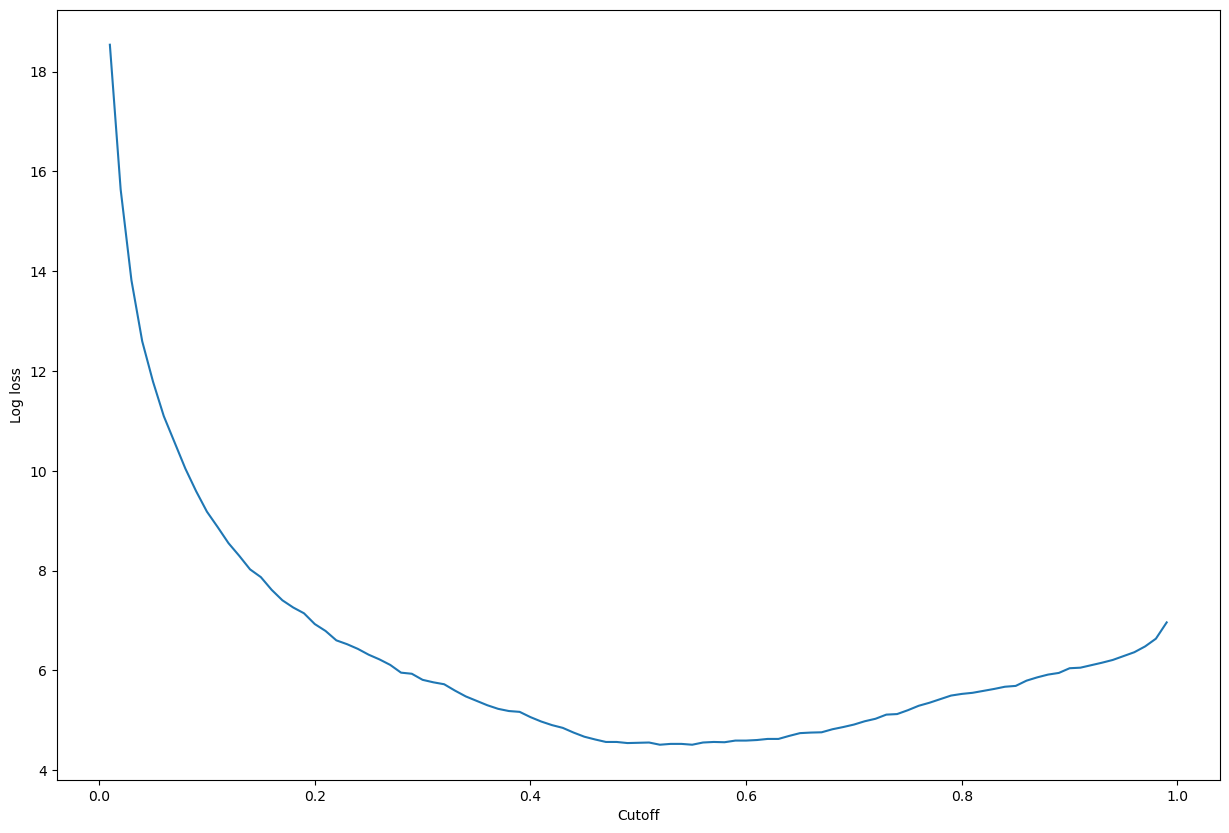

In [78]:
# To find the best cutoff with the given test set, compute the log loss function of the logistic regression.

import matplotlib.pyplot as plt

cutoffs = np.arange(0.01, 1, 0.01)
log_loss = []
for c in cutoffs:
    log_loss.append(
        sklearn.metrics.log_loss(test.iloc[:, 0], np.where(predictions > c, 1, 0))
    )

plt.figure(figsize=(15,10))
plt.plot(cutoffs, log_loss)
plt.xlabel("Cutoff")
plt.ylabel("Log loss")
plt.show()

In [79]:
print(
    'Log loss is minimized at a cutoff of ', cutoffs[np.argmin(log_loss)], 
    ', and the log loss value at the minimum is ', np.min(log_loss)
)

Log loss is minimized at a cutoff of  0.52 , and the log loss value at the minimum is  4.510299019212418


In [80]:
# Set a cutoff value = 0.53 to minimize log loss

import sklearn

cutoff=0.53
print(sklearn.metrics.confusion_matrix(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))
print(sklearn.metrics.classification_report(test.iloc[:, 0], np.where(predictions > cutoff, 1, 0)))

[[4736  290]
 [ 528  959]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      5026
           1       0.77      0.64      0.70      1487

    accuracy                           0.87      6513
   macro avg       0.83      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



In [81]:
# Clean Up